In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt

import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator # 이미지 분류
import tensorflow as tf

# 작업 실행 상황을 보여줌
from tqdm import tqdm_notebook
import cv2

import warnings
warnings.simplefilter('ignore')

## 1. 데이터불러오기

In [2]:
fashion = datasets.fashion_mnist
fashion_data = fashion.load_data()

In [3]:
(train_imgs, train_labels), (test_imgs, test_labels) = fashion_data

In [4]:
train_imgs.shape, train_labels.shape, test_imgs.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### 1-1 이미지 확인

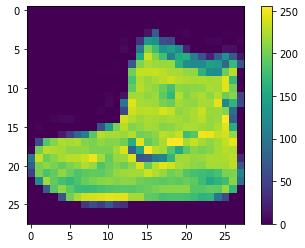

In [53]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_imgs[0])
plt.colorbar()
plt.show()

<img src='image/데이터설명.png' width=300 height=300>

### 2-1 라벨 이름 지정

In [6]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
len(label_names)

10

In [50]:
train_labels[0]

9

In [49]:
label_names[train_labels[0]]

'Ankle boot'

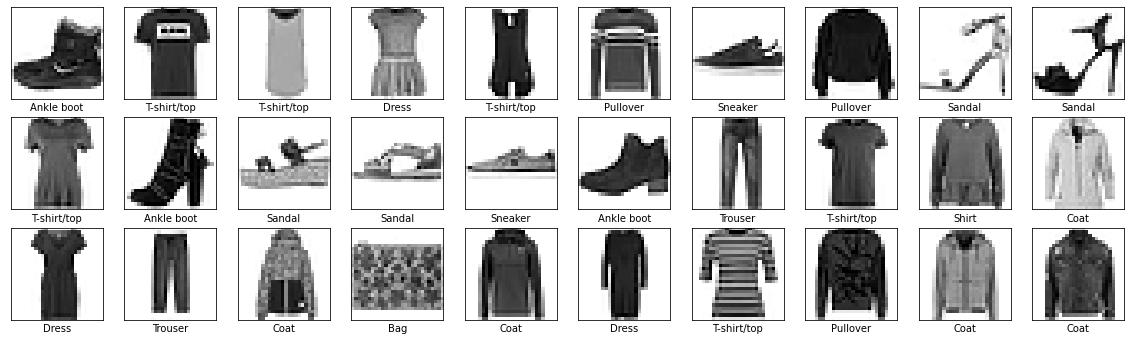

In [9]:
plt.figure(figsize=(20,20))
for i in range(30):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_imgs[i], cmap=plt.cm.binary)
    plt.xlabel(label_names[train_labels[i]])
plt.show()

### train, test 데이터 수정
- (28x28) 크기를 (255,255)로 늘리기
- train 5000, test 1000

In [21]:
# train_img data
x = []
for i in tqdm_notebook(range(0,5000)):
    image = cv2.resize(train_imgs[i], (100,100))
    image = image.tolist()
    x.append(image)

In [22]:
# test_img data
y = []
for i in tqdm_notebook(range(0,1000)):
    image = cv2.resize(test_imgs[i], (100,100))
    image = image.tolist()
    y.append(image)

In [23]:
# 리스트로 받은 데이터 다시 배열로 만들기
train=np.asarray(x)

In [24]:
test =np.asarray(y)

In [25]:
train.shape, test.shape

((5000, 100, 100), (1000, 100, 100))

In [26]:
# train_label data
lb_train= train_labels[:5000]
lb_train.shape

(5000,)

In [27]:
# test_label data
lb_test= train_labels[:1000]
lb_test.shape

(1000,)

## 3.모델구축

In [28]:
x_train= train.reshape(5000,-1)
x_train.shape

(5000, 10000)

In [29]:
x_test = test.reshape(1000,-1)
x_test.shape

(1000, 10000)

In [39]:
model = MLPClassifier(verbose=1)
model.fit(x_train, lb_train)

Iteration 1, loss = inf
Iteration 2, loss = 4.08062053
Iteration 3, loss = 2.40753014
Iteration 4, loss = 2.16217612
Iteration 5, loss = 1.79119399
Iteration 6, loss = 1.75947474
Iteration 7, loss = 1.69306748
Iteration 8, loss = 1.64476577
Iteration 9, loss = 1.59974573
Iteration 10, loss = 1.56408491
Iteration 11, loss = 1.52704613
Iteration 12, loss = 1.55187506
Iteration 13, loss = 1.52799114
Iteration 14, loss = 1.44208499
Iteration 15, loss = 1.48678189
Iteration 16, loss = 1.48818232
Iteration 17, loss = 1.46162779
Iteration 18, loss = 1.38570980
Iteration 19, loss = 1.34422131
Iteration 20, loss = 1.29132262
Iteration 21, loss = 1.29740496
Iteration 22, loss = 1.33395329
Iteration 23, loss = 1.26843692
Iteration 24, loss = 1.27050627
Iteration 25, loss = 1.26281070
Iteration 26, loss = 1.24070661
Iteration 27, loss = 1.21999633
Iteration 28, loss = 1.19129311
Iteration 29, loss = 1.15591636
Iteration 30, loss = 1.14785727
Iteration 31, loss = 1.19985004
Iteration 32, loss = 1.2

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [41]:
model.score(x_train, lb_train)

0.6104

In [42]:
x_train[0]

array([0, 0, 0, ..., 0, 0, 0])

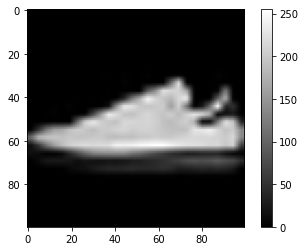

In [52]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train[6],'gray')
plt.colorbar()
plt.show()

In [45]:
model.predict([x_test[0]])

array([9], dtype=uint8)

In [46]:
model.predict([x_test[0]])

array([9], dtype=uint8)

## 모델 저장

In [40]:
from sklearn.externals import joblib

In [47]:
joblib.dump(model, 'dress.pkl')

['dress.pkl']